# Downloading Data from yahoo finance site  

In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=8eaa783ec16846e75ff9295d008a397699016bd633d251348957429107df23cf
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


TataSteel Share Price 

In [9]:
i = input()

TATASTEEL.NS


In [10]:
import yfinance as yf
#enter your company name
msft = yf.Ticker(i)

# get stock info
print(msft.info)

# get historical market data
hist = msft.history(period="5d")

{'zip': '400001', 'sector': 'Basic Materials', 'fullTimeEmployees': 65000, 'longBusinessSummary': 'Tata Steel Limited manufactures and distributes steel products in India and internationally. It operates in Tata Steel India, Bamnipal Steel (including Tata Steel BSL), Other Indian Operations, Tata Steel Europe, Other Trade Related Operations, and Rest of the World segments. The company offers hot-rolled (HR) and cold-rolled (CR) coated steel coils and sheets, precision tubes, tire bead wires, spring wires, and bearings, as well as auto ancillaries for the automotive market; and bearings, galvanized iron wires, agriculture and garden tools, and conveyance tubes, as well as fencing, farming, and irrigation equipment for the agriculture market. It also provides rebars, steel doors and windows, roofing sheets, plumbing pipes, tubes, prefabricated houses, water kiosks, modular toilets, office cabins, rooftop houses, EV charging stations, higher Dia rebars and corrosion-resistance steels, cut

In [11]:
data_df = yf.download(i, start="2020-02-01", end="2021-04-20")
data_df.to_csv('tata.csv')

[*********************100%***********************]  1 of 1 completed


In [12]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute
data = yf.download(tickers=i, period='1d', interval='1m')
data.to_csv("data.csv")


[*********************100%***********************]  1 of 1 completed


**visualization the price using plotly**

In [13]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='TATASTEEL live share price evolution',
    yaxis_title='Stock Price (INR per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

# Preprocessing the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
import json
warnings.filterwarnings("ignore")



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df1=pd.read_csv('data.csv')
df1.head(4)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01 09:15:00+05:30,821.500000,826.099976,821.000000,822.500000,822.500000,0
1,2021-04-01 09:16:00+05:30,822.700012,824.000000,821.400024,822.299988,822.299988,274619
2,2021-04-01 09:17:00+05:30,822.599976,823.950012,821.549988,822.299988,822.299988,251873
3,2021-04-01 09:18:00+05:30,822.000000,823.500000,822.000000,823.200012,823.200012,150851


In [ ]:
df1.shape

(374, 7)

In [ ]:
df1=row2.T

In [ ]:

df1.head(10)


,Date,TT
0,14-Mar-20,81
3,15-Mar-20,27
6,16-Mar-20,15
9,17-Mar-20,11
12,18-Mar-20,37
15,19-Mar-20,27
18,20-Mar-20,58
21,21-Mar-20,78
24,22-Mar-20,67
27,23-Mar-20,102


In [ ]:
df1.columns=['Date','TT']

In [ ]:
df1.to_csv('file.csv')

In [ ]:
df1.head()

,Date,TT
0,14-Mar-20,81
3,15-Mar-20,27
6,16-Mar-20,15
9,17-Mar-20,11
12,18-Mar-20,37


ending


In [ ]:
df2=df1.drop(['Volume'], axis = 1)
df2.head()
#df1= df1.drop['Volume']

,Datetime,Open,High,Low,Close,Adj Close
0,2021-04-01 09:15:00+05:30,821.500000,826.099976,821.000000,822.500000,822.500000
1,2021-04-01 09:16:00+05:30,822.700012,824.000000,821.400024,822.299988,822.299988
2,2021-04-01 09:17:00+05:30,822.599976,823.950012,821.549988,822.299988,822.299988
3,2021-04-01 09:18:00+05:30,822.000000,823.500000,822.000000,823.200012,823.200012
4,2021-04-01 09:19:00+05:30,823.000000,823.400024,820.000000,820.599976,820.599976


In [ ]:
df2.Datetime=pd.to_datetime(df2.Datetime)

In [ ]:
df2["Datetime"] = pd.to_numeric(df2["Datetime"], downcast="float")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   374 non-null    float32
 1   Open       374 non-null    float64
 2   High       374 non-null    float64
 3   Low        374 non-null    float64
 4   Close      374 non-null    float64
 5   Adj Close  374 non-null    float64
dtypes: float32(1), float64(5)
memory usage: 16.2 KB


Prediction using LSTM

# tsla pred

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 2, batch_size = 32)

Epoch 1/2
24/24 [==============================] - 10s 117ms/step - loss: 0.1685
Epoch 2/2
24/24 [==============================] - 3s 128ms/step - loss: 0.0230


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


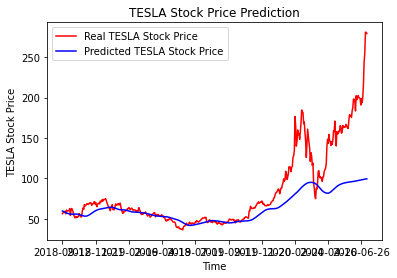

In [ ]:
# Visualising the results
plt.plot(df.loc[800:,'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# TATA Stock Prices Prediction Using Keras LSTM

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the training set
dataset_train = pd.read_csv('TATASTEEL.NS.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-01,302.017517,309.544128,301.064789,308.353210,268.619507,3239154.0
1,2015-04-06,309.067780,310.211060,301.636414,303.065521,264.013184,3851719.0
2,2015-04-07,305.161560,319.357330,302.017517,317.737671,276.794678,7655550.0
3,2015-04-08,320.214783,322.882446,313.069275,320.214783,278.952606,6596499.0
4,2015-04-09,321.548615,330.980713,321.072235,329.694519,287.210815,6456672.0


In [ ]:
dataset_train.shape

(1231, 7)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)



Epoch 1/10
30/30 [==============================] - 10s 111ms/step - loss: 0.0443
Epoch 2/10
30/30 [==============================] - 3s 115ms/step - loss: 0.0087
Epoch 3/10
30/30 [==============================] - 4s 117ms/step - loss: 0.0061
Epoch 4/10
30/30 [==============================] - 3s 116ms/step - loss: 0.0066
Epoch 5/10
30/30 [==============================] - 3s 116ms/step - loss: 0.0058
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.0049
Epoch 7/10
30/30 [==============================] - 3s 112ms/step - loss: 0.0052
Epoch 8/10
30/30 [==============================] - 3s 113ms/step - loss: 0.0044
Epoch 9/10
30/30 [==============================] - 3s 114ms/step - loss: 0.0043
Epoch 10/10
30/30 [==============================] - 3s 112ms/step - loss: 0.0050


In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/TATASTEEL.NS.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1200):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


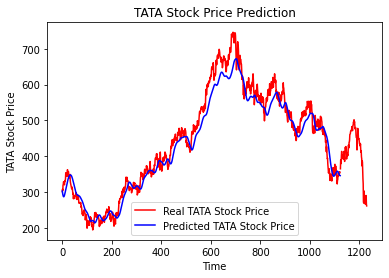

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()